Exploring of predictability clusters

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
datadir='data/'
picdir='pictures/'
setname='D2'
space=pd.read_csv(datadir+setname+'total.csv')#.drop('Unnamed: 0', axis=1)
space.id=space.id.astype(int)
space['node']=(np.packbits(space.iloc[:,2:], axis=1, bitorder='big')//8).astype(int)
space

,step,id,cat63,cat60,cat51,cat29,cat13,node
0,step00,0,1,1,1,1,1,31
1,step01,0,1,1,1,1,1,31
2,step02,0,1,1,1,1,1,31
3,step03,0,1,1,1,1,1,31
4,step04,0,1,1,1,1,1,31
...,...,...,...,...,...,...,...,...
143675,step15,7183,0,0,1,0,1,5
143676,step16,7183,0,0,1,0,1,5
143677,step17,7183,0,0,1,0,1,5
143678,step18,7183,0,0,1,0,1,5


In [3]:
N_clust=space.node.max()+1
N_steps=len(space[space.id==0])

if setname=='D1':
    d=pd.date_range(start='2017-04-08',end='2017-10-30',  freq='2w').strftime('%Y-%m-%d')
else:
    d=pd.date_range(start='2019-10-15',end='2020-10-01',  freq='2w').strftime('%Y-%m-%d')
N_clust, N_steps

(32, 20)

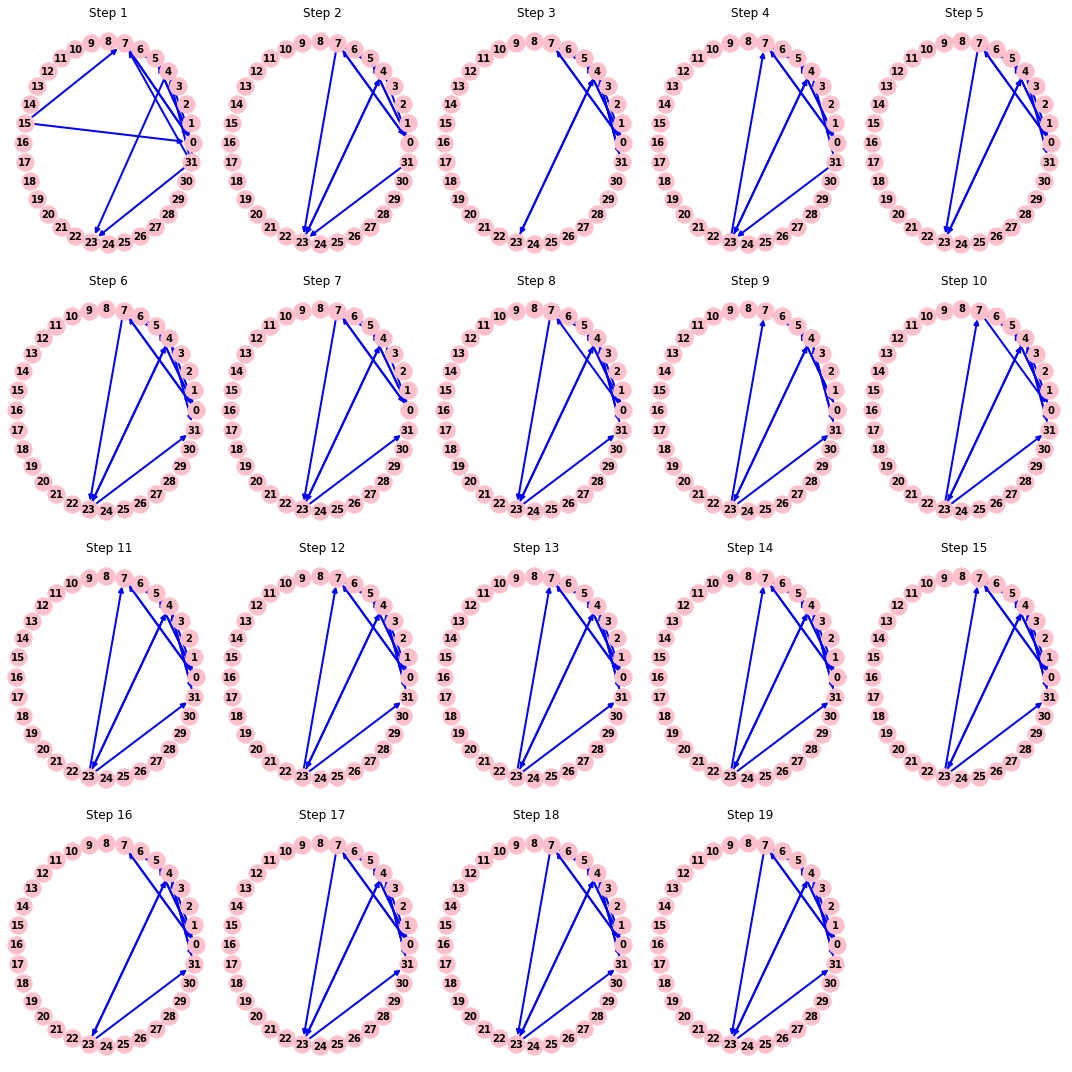

In [4]:
n=[]
fig=plt.figure(figsize=(15, 15))
for i in range(N_steps-1):
    s1=space[space.step=='step'+str(i).zfill(2)]
    s2=space[space.step=='step'+str(i+1).zfill(2)]
    G=nx.DiGraph()
    G.add_nodes_from(np.arange(N_clust))
    nod=s1.node.values
    nod2=s2.node.values
    r=[(nod[j], nod2[j]) for j in range(len(nod)) if nod[j]!=nod2[j]]
    c=[r.count(j) for j in r]
    G.add_weighted_edges_from([(r[j][0],r[j][1],c[j]) for j in range(len(c)) if nod2[j]!=nod[j+1]])
    plt.subplot(4,5,i+1)
    n.append(len(r))
    nx.draw(G, pos=nx.circular_layout(G),
                   with_labels=True,
                   node_color='pink', font_weight='bold',font_size=10,
                   edge_color='b',node_size=300, width=2 )
    plt.title('Step %i'%(i+1), )
fig.tight_layout()

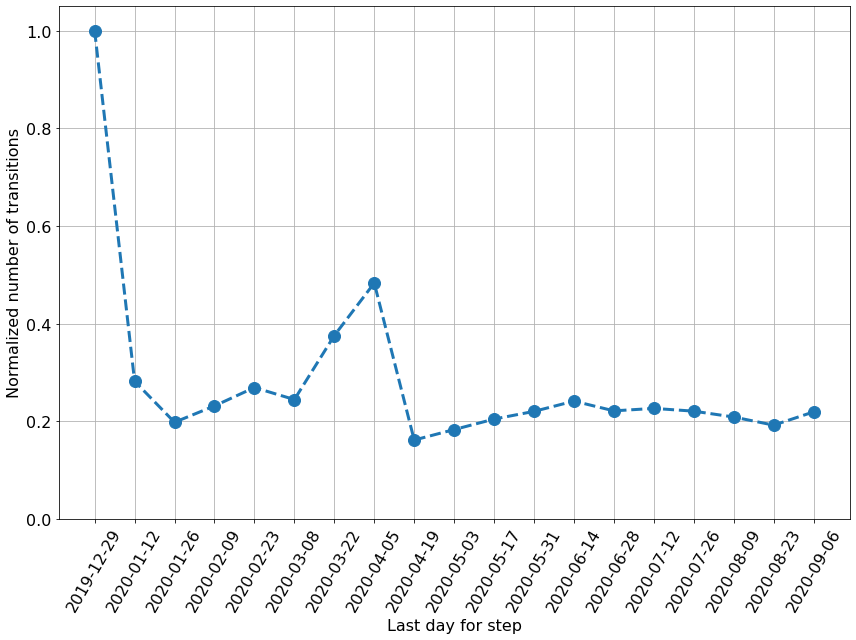

In [5]:

plt.figure(figsize=(12,9))
plt.plot(np.array(n)/max(n), ls='--', marker='o', lw=3, markersize=12)
plt.xticks(np.arange(N_steps-1),d[5:-1],rotation=60,size=16)
plt.yticks(size=16)
plt.xlabel('Last day for step', size=16)
plt.ylabel('Normalized number of transitions', size=16)
plt.ylim(0,1.05)
plt.grid()
plt.tight_layout()
plt.savefig(picdir+setname+'transition_amount.png', dpi=300, format='png' )
plt.show()

In [6]:
ss=space.groupby(['step']).node.value_counts()
trans = np.zeros([N_steps, N_clust ]).astype(int)
for i, s in ss.index:
    trans[int(i[4:])-1,s]=ss[(i,s)]
trans             

array([[1486,    0,    0,    0,  106, 1350,    0, 3988,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  229,    0,    0,    0,    0,    0,    0,    0,   25],
       [1558,    0,    0,    0,  102, 1043,    0, 4217,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  241,    0,    0,    0,    0,    0,    0,    0,   23],
       [1586,    0,    0,    0,  139,  994,    0, 4217,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  229,    0,    0,    0,    0,    0,    0,    0,   19],
       [1615,    0,    0,    0,  136, 1084,    0, 4124,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  213,    0,    0,    0,    0,    0,    0,    0,   12],
       [1637,    0,    0,    0,  116, 1383,    0, 3816,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   

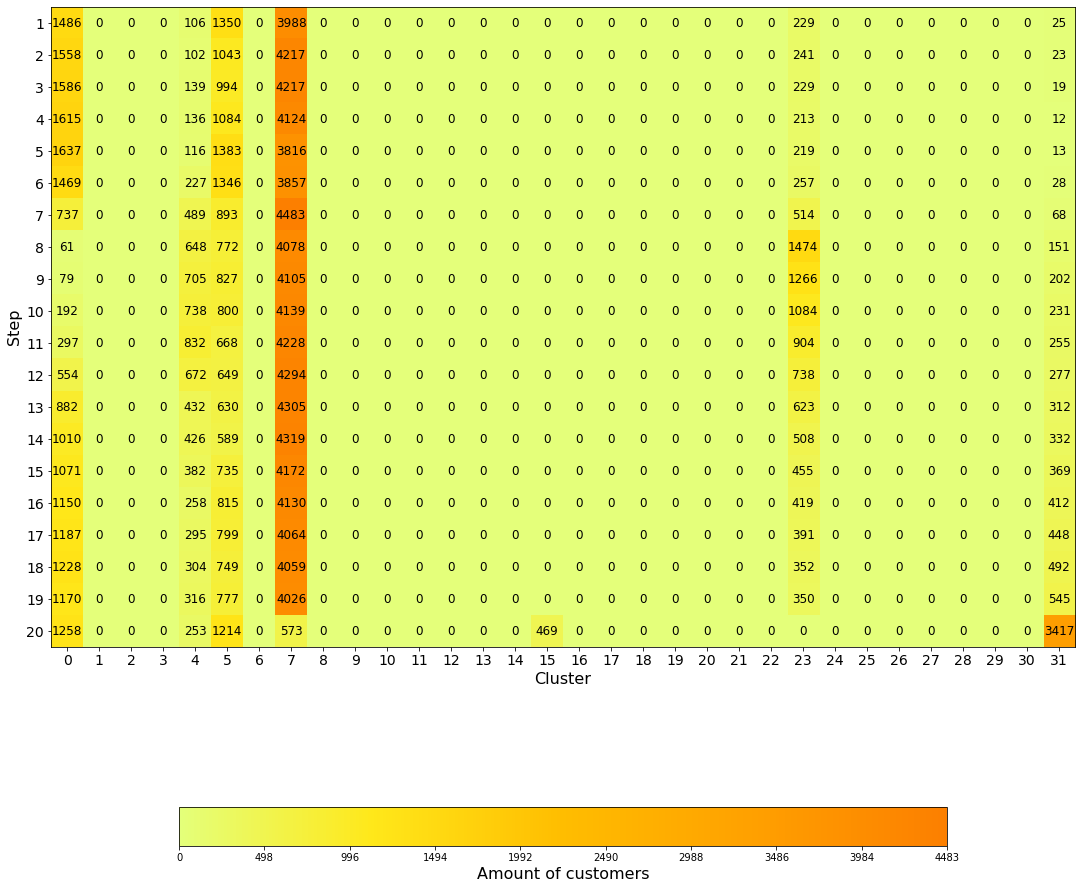

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))
fig.patch.set_facecolor('white')
im = ax.imshow(trans,  interpolation='none', cmap='Wistia')
cbar = ax.figure.colorbar(im, ax=ax, shrink=.75, location='bottom')
cbar.ax.set_xlabel('Amount of customers',va="top", size=16)
cbar.set_ticks(np.linspace(trans.min(),trans.max(),10))
cbar.set_ticklabels(np.linspace(trans.min(),trans.max(),10).astype(int))
ax.set_xticks(np.arange(trans.shape[1]))
ax.set_yticks(np.arange(trans.shape[0]))
ax.set_ylabel('Step', size=16)
ax.set_xlabel('Cluster', size=16)
ax.set_facecolor('white')
for i in range(trans.shape[0]):
    for j in range(trans.shape[1]):
        ax.text(j, i, (trans[i, j]).round(2),
                       ha="center", va="center", color="black", size=12)
ax.set_xticklabels((np.arange(trans.shape[1])).astype(str), size=14)
ax.set_yticklabels((np.arange(trans.shape[0])+1).astype(str), size=14)
ax.set_title("", size=20)
plt.tight_layout(pad=.5, h_pad=0.1)
plt.savefig(picdir+setname+'transheat.png', dpi=300, format='png' )
plt.show()